In [1]:
##Revannath Jondhale ## SVM for salary data

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import seaborn as sb

In [5]:
import matplotlib.pyplot as plt

In [6]:
## importing the data
## we no need to do the train and test data because its already provided so we are going to the next step

In [7]:
salary_train = pd.read_csv("SalaryData_Train(1).csv")

In [8]:
alary_test = pd.read_csv("SalaryData_Test(1).csv")

In [9]:
## See the data

In [10]:
salary_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [11]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [12]:
salary_train.shape

(30161, 14)

In [13]:
#columns

In [14]:
salary_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [15]:
##copying the data so we can edit it without interfering with the original dataframe

In [16]:
#salary_train_needed = salary_train.copy()

In [17]:
##Remove unneccesory column

In [18]:
salary_train_needed = salary_train.drop(["educationno","maritalstatus","relationship","race","sex","native"],axis = 1)

In [19]:
salary_train_needed

,age,workclass,education,occupation,capitalgain,capitalloss,hoursperweek,Salary
0,39,State-gov,Bachelors,Adm-clerical,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,0,0,13,<=50K
2,38,Private,HS-grad,Handlers-cleaners,0,0,40,<=50K
3,53,Private,11th,Handlers-cleaners,0,0,40,<=50K
4,28,Private,Bachelors,Prof-specialty,0,0,40,<=50K
...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,Tech-support,0,0,38,<=50K
30157,40,Private,HS-grad,Machine-op-inspct,0,0,40,>50K
30158,58,Private,HS-grad,Adm-clerical,0,0,40,<=50K
30159,22,Private,HS-grad,Adm-clerical,0,0,20,<=50K


In [20]:
salary_train_needed.columns

Index(['age', 'workclass', 'education', 'occupation', 'capitalgain',
       'capitalloss', 'hoursperweek', 'Salary'],
      dtype='object')

In [21]:
# now see if there are any outlier behaviour present in the numerical data 

<AxesSubplot:>

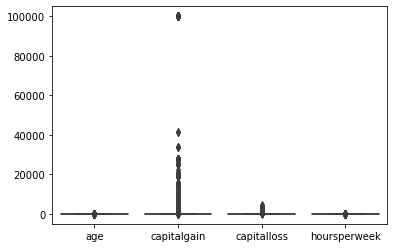

In [22]:
sb.boxplot(data = salary_train_needed)

In [23]:
# now view them seperately  get more cleat view

<AxesSubplot:>

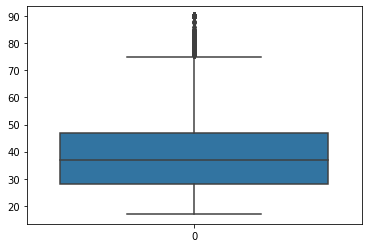

In [24]:
sb.boxplot(data = salary_train_needed.age)

In [25]:
##few outliers can be seen in the graph so we will try to detect them using the funtion below

In [26]:
outliers=[]

In [28]:
def detect_outlier(data_1):
    outliers.clear()
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [29]:
outliers = detect_outlier(salary_train_needed.age)

In [30]:
print(outliers) 

[79, 90, 81, 78, 90, 88, 90, 90, 78, 80, 90, 81, 81, 80, 90, 79, 81, 90, 90, 80, 90, 90, 79, 78, 79, 84, 90, 80, 90, 81, 83, 84, 79, 85, 82, 79, 90, 90, 84, 78, 78, 80, 90, 90, 84, 90, 90, 90, 78, 81, 78, 82, 81, 80, 90, 80, 84, 82, 78, 79, 90, 84, 90, 83, 78, 80, 78, 79, 80, 79, 80, 90, 90, 90, 81, 83, 90, 90, 81, 80, 80, 90, 79, 80, 82, 85, 80, 79, 90, 79, 81, 88, 90, 82, 88, 83, 79, 86, 90, 82, 83, 81, 79, 84, 78, 78, 84, 79, 78, 90, 80, 81, 78, 81, 90, 80, 82, 90, 90, 85]


In [31]:
len(outliers)

120

In [32]:
##lenth is 120

In [33]:
z = np.array(outliers)

In [34]:
np.unique(outliers)

array([78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 90])

In [35]:
len(np.unique(outliers))

11

In [36]:
# Outliers in the capital gain column

<AxesSubplot:>

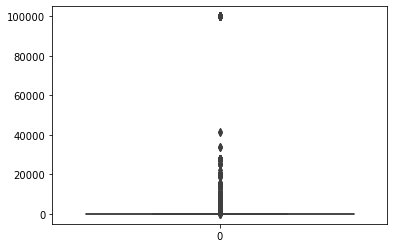

In [37]:
sb.boxplot(data = salary_train_needed.capitalgain)

<AxesSubplot:>

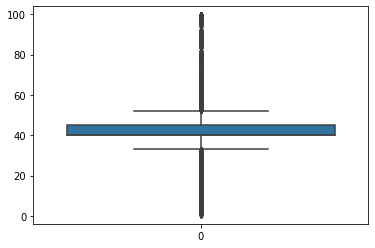

In [38]:
sb.boxplot(data = salary_train_needed.hoursperweek)

In [39]:
outliers = detect_outlier(salary_train_needed.hoursperweek)

In [40]:
print(outliers)

[80, 80, 2, 1, 98, 80, 80, 80, 99, 80, 80, 99, 80, 80, 78, 90, 80, 80, 90, 84, 99, 80, 90, 84, 3, 98, 80, 85, 84, 80, 3, 84, 99, 80, 84, 84, 78, 3, 85, 99, 80, 84, 99, 3, 77, 84, 90, 98, 80, 99, 99, 80, 80, 80, 3, 80, 85, 98, 80, 2, 4, 87, 88, 90, 80, 99, 90, 90, 80, 80, 2, 99, 89, 80, 80, 80, 97, 85, 78, 80, 90, 90, 99, 4, 84, 80, 4, 80, 99, 80, 2, 80, 80, 84, 80, 99, 84, 80, 80, 80, 80, 99, 90, 80, 94, 3, 80, 85, 80, 99, 4, 99, 80, 77, 85, 80, 85, 99, 96, 4, 99, 77, 4, 82, 2, 80, 80, 90, 3, 99, 4, 80, 80, 1, 80, 97, 2, 99, 84, 99, 85, 80, 80, 80, 99, 99, 80, 90, 3, 80, 4, 86, 80, 99, 99, 99, 80, 3, 84, 99, 3, 84, 2, 80, 84, 4, 80, 99, 91, 2, 81, 84, 96, 99, 99, 99, 80, 78, 3, 99, 80, 99, 80, 4, 84, 84, 98, 80, 3, 80, 80, 99, 99, 80, 88, 98, 99, 80, 98, 80, 80, 4, 4, 84, 99, 81, 2, 90, 84, 98, 99, 4, 84, 84, 84, 4, 99, 3, 80, 99, 99, 92, 3, 2, 99, 80, 2, 90, 99, 99, 1, 3, 80, 80, 80, 80, 99, 80, 80, 84, 77, 84, 80, 80, 80, 90, 1, 99, 99, 84, 3, 80, 80, 85, 91, 85, 80, 80, 99, 84, 99, 

In [41]:
len(outliers)

402

In [42]:
z = np.array(outliers)

In [43]:
np.unique(outliers)

array([ 1,  2,  3,  4, 77, 78, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91,
       92, 94, 95, 96, 97, 98, 99])

In [44]:
len(np.unique(outliers))

24

In [45]:
# we will see the count plot for these columns to get their general nature of the data

In [46]:
salary_train_needed.columns

Index(['age', 'workclass', 'education', 'occupation', 'capitalgain',
       'capitalloss', 'hoursperweek', 'Salary'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71]),
 [Text(0, 0, '17'),
  Text(1, 0, '18'),
  Text(2, 0, '19'),
  Text(3, 0, '20'),
  Text(4, 0, '21'),
  Text(5, 0, '22'),
  Text(6, 0, '23'),
  Text(7, 0, '24'),
  Text(8, 0, '25'),
  Text(9, 0, '26'),
  Text(10, 0, '27'),
  Text(11, 0, '28'),
  Text(12, 0, '29'),
  Text(13, 0, '30'),
  Text(14, 0, '31'),
  Text(15, 0, '32'),
  Text(16, 0, '33'),
  Text(17, 0, '34'),
  Text(18, 0, '35'),
  Text(19, 0, '36'),
  Text(20, 0, '37'),
  Text(21, 0, '38'),
  Text(22, 0, '39'),
  Text(23, 0, '40'),
  Text(24, 0, '41'),
  Text(25, 0, '42'),
  Text(26, 0, '43'),
  Text(27, 0, '44'),
  Text(28, 0, '45'),
  Text(29, 0, '46'),
  Text(30, 0, '47'),
  Text(31, 0, '48'),
  Text(3

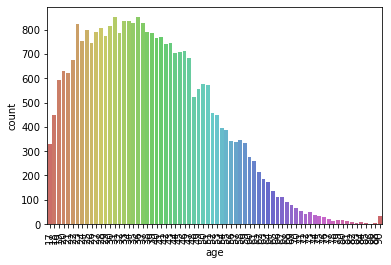

In [47]:
sb.countplot(x = 'age', data = salary_train_needed, palette = 'hls'); plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' State-gov'),
  Text(1, 0, ' Self-emp-not-inc'),
  Text(2, 0, ' Private'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' Self-emp-inc'),
  Text(6, 0, ' Without-pay')])

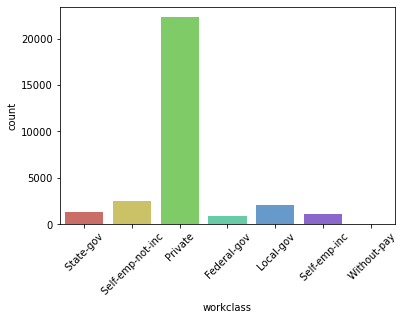

In [48]:
sb.countplot(x = 'workclass', data = salary_train_needed, palette = 'hls'); plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' 7th-8th'),
  Text(8, 0, ' Doctorate'),
  Text(9, 0, ' Assoc-voc'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' Preschool'),
  Text(14, 0, ' 12th'),
  Text(15, 0, ' 1st-4th')])

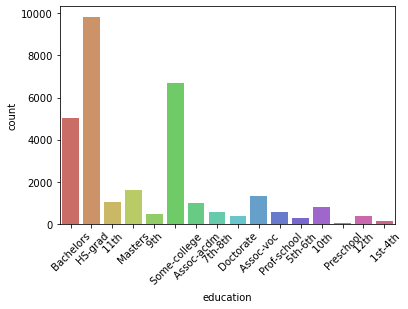

In [49]:
sb.countplot(x = 'education', data = salary_train_needed, palette = 'hls'); plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Adm-clerical'),
  Text(1, 0, ' Exec-managerial'),
  Text(2, 0, ' Handlers-cleaners'),
  Text(3, 0, ' Prof-specialty'),
  Text(4, 0, ' Other-service'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Transport-moving'),
  Text(7, 0, ' Farming-fishing'),
  Text(8, 0, ' Machine-op-inspct'),
  Text(9, 0, ' Tech-support'),
  Text(10, 0, ' Craft-repair'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

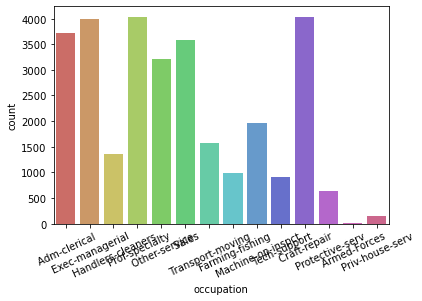

In [50]:
sb.countplot(x = 'occupation', data = salary_train_needed, palette = 'hls'); plt.xticks(rotation = 25)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117]),
 [Text(0, 0, '0'),
  Text(1, 0, '114'),
  Text(2, 0, '401'),
  Text(3, 0, '594'),
  Text(4, 0, '914'),
  Text(5, 0, '991'),
  Text(6, 0, '1055'),
  Text(7, 0, '1086'),
  Text(8, 0, '1151'),
  Text(9, 0, '1173'),
  Text(10, 0, '1409'),
  Text(11, 0, '1424'),
  Text(12, 0, '1455'),
  Text(13, 0, '1471'),
  Text(14, 0, '1506'),
 

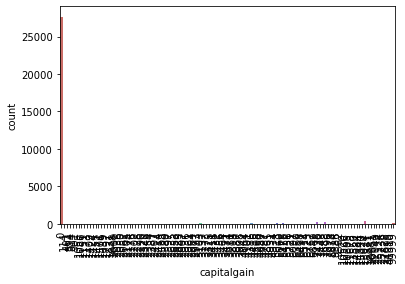

In [51]:
sb.countplot(x = 'capitalgain', data = salary_train_needed, palette = 'hls'); plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]),
 [Text(0, 0, '0'),
  Text(1, 0, '155'),
  Text(2, 0, '213'),
  Text(3, 0, '323'),
  Text(4, 0, '419'),
  Text(5, 0, '625'),
  Text(6, 0, '653'),
  Text(7, 0, '810'),
  Text(8, 0, '880'),
  Text(9, 0, '974'),
  Text(10, 0, '1092'),
  Text(11, 0, '1138'),
  Text(12, 0, '1258'),
  Text(13, 0, '1340'),
  Text(14, 0, '1380'),
  Text(15, 0, '1408'),
  Text(16, 0, '1411'),
  Text(17, 0, '1485'),
  Text(18, 0, '1504'),
  Text(19, 0, '1539'),
  Text(20, 0, '1564'),
  Text(21, 0, '1573'),
  Text(22, 0, '1579'),
  Text(23, 0, '1590'),
  Text(24, 0, '1594'),
  Text(25, 0, '1602'),
  Text(26, 0, 

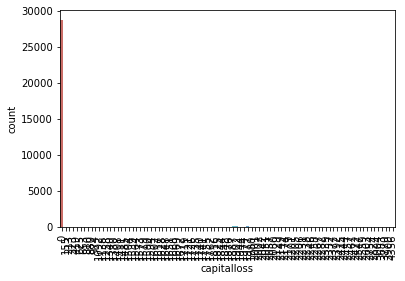

In [52]:
sb.countplot(x = 'capitalloss', data = salary_train_needed, palette = 'hls'); plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Tex

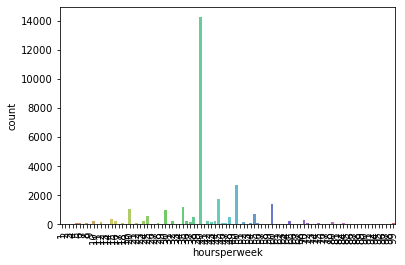

In [53]:
sb.countplot(x = 'hoursperweek', data = salary_train_needed, palette = 'hls'); plt.xticks(rotation = 90)

In [54]:
# Now we have plot the bar graphs for the few of the columns to see their performance and behaviour against desired output of our model

<AxesSubplot:xlabel='age'>

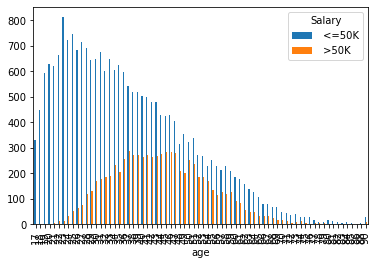

In [55]:
pd.crosstab(salary_train_needed.age,salary_train_needed.Salary).plot(kind = "bar")

<AxesSubplot:xlabel='workclass'>

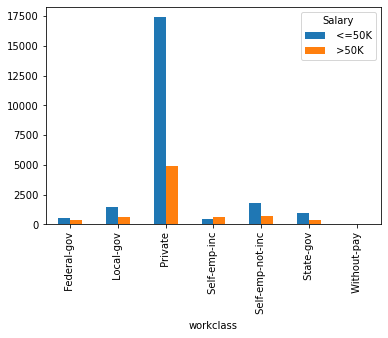

In [56]:
pd.crosstab(salary_train_needed.workclass,salary_train_needed.Salary).plot(kind = "bar")

<AxesSubplot:xlabel='education'>

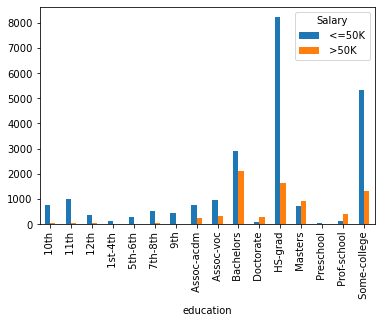

In [57]:
pd.crosstab(salary_train_needed.education,salary_train_needed.Salary).plot(kind = "bar")

<AxesSubplot:xlabel='occupation'>

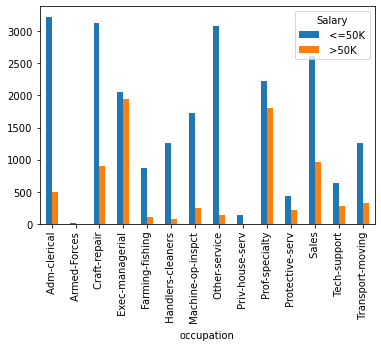

In [58]:
pd.crosstab(salary_train_needed.occupation,salary_train_needed.Salary).plot(kind = "bar")

<AxesSubplot:xlabel='hoursperweek'>

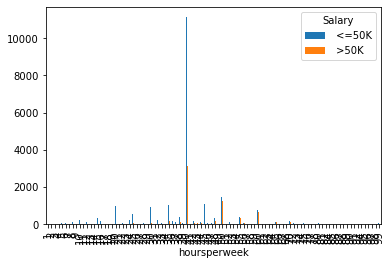

In [59]:
pd.crosstab(salary_train_needed.hoursperweek,salary_train_needed.Salary).plot(kind = "bar")

In [60]:
salary_test_needed = salary_test.drop(["educationno","maritalstatus","relationship","race","sex","native"],axis = 1)

NameError: name 'salary_test' is not defined

In [ ]:
## now we going to model building

In [ ]:
output_data_train = salary_train_needed.iloc[:,7]"3D Objects"

In [ ]:
output_data_test = salary_test_needed.iloc[:,7]

In [ ]:
input_data_train = salary_train_needed.iloc[:,:7]

In [ ]:
input_data_test = salary_test_needed.iloc[:,:7]

In [ ]:
input_data_train.columns

In [ ]:
model_data_train = pd.get_dummies(data = input_data_train, columns = ['workclass', 'education', 'occupation'])

In [ ]:
model_data_test = pd.get_dummies(data = input_data_test, columns = ['workclass', 'education', 'occupation'])

In [ ]:
model_data_train

In [62]:
from sklearn.svm import SVC

In [ ]:
# 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'

In [ ]:
# Kernel 'Linear'
model_linear = SVC(kernel = 'linear')

In [ ]:
model_linear.fit(model_data_train,output_data_train)

In [ ]:
predict_linear_test = model_linear.predict(model_data_test)

In [ ]:
accuracy = np.mean(predict_linear_test = output_data_test)### Accuracy

In [ ]:
# Kernel 'poly'
model_poly = SVC(kernel = 'poly')

In [ ]:
model_poly.fit(model_data_train,output_data_train)

In [ ]:
predict_poly_test = model_poly.predict(model_data_test)

In [ ]:
accuracy = np.mean(predict_poly_test = output_data_test)# Accuracy

In [ ]:
 ##Kernel 'rbf'
model_rbf = SVC(kernel = 'rbf')

In [ ]:
model_rbf.fit(model_data_train,output_data_train)

In [ ]:
predict_rbf_test = model_rbf.predict(model_data_test)

In [ ]:
accuracy = np.mean(predict_rbf_test == output_data_test)

In [ ]:
accuracy   # 83.51925%

In [ ]:
# Kernel 'sigmoid'
model_sigmoid = SVC(kernel = 'sigmoid')

In [ ]:
model_sigmoid.fit(model_data_train,output_data_train)

In [ ]:
predict_sigmoid_test = model_sigmoid.predict(model_data_test)

In [ ]:
accuracy = np.mean(predict_sigmoid_test == output_data_test)

In [ ]:
accuracy   # 75.43160%

In [ ]:
# Of these results we have got the best accuracy of 83.51% from the rbf kernel.